In [ ]:

pip install scikit-learn


In [ ]:
import pandas as pd
import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
exp_vinhos  = pd.read_csv('CSV/ExpVinho.csv', sep=';', encoding="utf-8", decimal=',')
exp_vinhos

Armazenando os dados Pivoteados

In [ ]:
dfs_litro = []
dfs_valor = []

Adicionando a colunas de Ano e pivotando os dados

In [ ]:
for col in exp_vinhos.columns:
    if col.startswith('19') or col.startswith('20'):  # Verificar se é uma coluna de ano
        ano = col.split('.')[0]  # Extrair o ano
        litro_col = col
        valor_col = col + '.1'
        if litro_col in exp_vinhos.columns and valor_col in exp_vinhos.columns:
            df_litro = exp_vinhos[['Id', 'País', litro_col]].rename(columns={litro_col: 'Litros'})
            df_valor = exp_vinhos[['Id', 'País', valor_col]].rename(columns={valor_col: 'Valor'})
            df_litro['Ano'] = ano
            df_valor['Ano'] = ano
            dfs_litro.append(df_litro)
            dfs_valor.append(df_valor)

Juntando para um unico dataframe

In [ ]:
df_final_litro = pd.concat(dfs_litro)
df_final_valor = pd.concat(dfs_valor)

Combinando os dataframes e ajustando a ordem

In [ ]:
exp_vinhos_ajustado = pd.merge(df_final_litro, df_final_valor, on=["Id", "País", "Ano"])[['Id', 'País', 'Ano', 'Litros', 'Valor']]

In [ ]:
exp_vinhos_ajustado

Manipulando os Dados

In [ ]:
# Converter a coluna 'Ano' para int
exp_vinhos_ajustado['Ano'] = pd.to_numeric(exp_vinhos_ajustado['Ano'], errors='coerce')
exp_vinhos_ajustado['País'] = exp_vinhos_ajustado['País'].replace('Alemanha, República Democrática', 'Alemanha')

In [ ]:
# Ajustando nomes
paises = exp_vinhos_ajustado['País']
litros = exp_vinhos_ajustado['Litros']
valor  = exp_vinhos_ajustado['Valor']
ano    = exp_vinhos_ajustado['Ano']

In [ ]:
# Dados dos ultimos 15 anos -  Exportação
dados_15_anos = exp_vinhos_ajustado.query('Ano > 2007')

In [ ]:
# Lista de Paises por continentes
paises_continente = {
    'Afeganistão': 'Ásia',
    'Alemanha': 'Europa',
    'Angola': 'África',
    'Anguilla': 'América do Norte',
    'Antilhas Holandesas': 'América do Norte',
    'Antígua e Barbuda': 'América do Norte',
    'Argentina': 'América do Sul',
    'Aruba': 'América do Norte',
    'Austrália': 'Oceania',
    'Bahamas': 'América do Norte',
    'Bangladesh': 'Ásia',
    'Barbados': 'América do Norte',
    'Barein': 'Ásia',
    'Belice': 'América do Norte',
    'Benin': 'África',
    'Bolívia': 'América do Sul',
    'Brasil': 'América do Sul',
    'Bulgária': 'Europa',
    'Bélgica': 'Europa',
    'Bósnia-Herzegovina': 'Europa',
    'Cabo Verde': 'África',
    'Camarões': 'África',
    'Canadá': 'América do Norte',
    'Catar': 'Ásia',
    'Cayman, Ilhas': 'América do Norte',
    'Chile': 'América do Sul',
    'China': 'Ásia',
    'Chipre': 'Europa',
    'Cingapura': 'Ásia',
    'Cocos (Keeling), Ilhas': 'Oceania',
    'Colômbia': 'América do Sul',
    'Comores': 'África',
    'Congo': 'África',
    'Coreia, Republica Sul': 'Ásia',
    'Costa Rica': 'América do Norte',
    'Costa do Marfim': 'África',
    'Croácia': 'Europa',
    'Cuba': 'América do Norte',
    'Curaçao': 'América do Norte',
    'Dinamarca': 'Europa',
    'Dominica': 'América do Norte',
    'El Salvador': 'América do Norte',
    'Emirados Arabes Unidos': 'Ásia',
    'Equador': 'América do Sul',
    'Eslovaca, Republica': 'Europa',
    'Espanha': 'Europa',
    'Estados Unidos': 'América do Norte',
    'Estônia': 'Europa',
    'Filipinas': 'Ásia',
    'Finlândia': 'Europa',
    'França': 'Europa',
    'Gana': 'África',
    'Gibraltar': 'Europa',
    'Granada': 'América do Norte',
    'Grécia': 'Europa',
    'Guatemala': 'América do Norte',
    'Guiana': 'América do Sul',
    'Guiana Francesa': 'América do Sul',
    'Guine Bissau': 'África',
    'Guine Equatorial': 'África',
    'Haiti': 'América do Norte',
    'Honduras': 'América do Norte',
    'Hong Kong': 'Ásia',
    'Hungria': 'Europa',
    'Ilha de Man': 'Europa',
    'Ilhas Virgens': 'América do Norte',
    'India': 'Ásia',
    'Indonésia': 'Ásia',
    'Iraque': 'Ásia',
    'Irlanda': 'Europa',
    'Irã': 'Ásia',
    'Itália': 'Europa',
    'Jamaica': 'América do Norte',
    'Japão': 'Ásia',
    'Jordânia': 'Ásia',
    'Letônia': 'Europa',
    'Libéria': 'África',
    'Luxemburgo': 'Europa',
    'Líbano': 'Ásia',
    'Malta': 'Europa',
    'Malásia': 'Ásia',
    'Marshall, Ilhas': 'Oceania',
    'Mauritânia': 'África',
    'Montenegro': 'Europa',
    'Moçambique': 'África',
    'México': 'América do Norte',
    'Namibia': 'África',
    'Nicaragua': 'América do Norte',
    'Nigéria': 'África',
    'Noruega': 'Europa',
    'Nova Caledônia': 'Oceania',
    'Nova Zelândia': 'Oceania',
    'Omã': 'Ásia',
    'Panamá': 'América do Norte',
    'Paraguai': 'América do Sul',
    'Países Baixos': 'Europa',
    'Peru': 'América do Sul',
    'Polônia': 'Europa',
    'Porto Rico': 'América do Norte',
    'Portugal': 'Europa',
    'Quênia': 'África',
    'Reino Unido': 'Europa',
    'República Dominicana': 'América do Norte',
    'Rússia': 'Europa/Ásia',
    'Senegal': 'África',
    'Serra Leoa': 'África',
    'Singapura': 'Ásia',
    'Suazilândia': 'África',
    'Suriname': 'América do Sul',
    'Suécia': 'Europa',
    'Suíça': 'Europa',
    'São Tomé e Príncipe': 'África',
    'São Vicente e Granadinas': 'América do Norte',
    'Tailândia': 'Ásia',
    'Taiwan (FORMOSA)': 'Ásia',
    'Tanzânia': 'África',
    'Tcheca, República': 'Europa',
    'Togo': 'África',
    'Trinidade Tobago': 'América do Norte',
    'Tunísia': 'África',
    'Turquia': 'Europa/Ásia',
    'Tuvalu': 'Oceania',
    'Uruguai': 'América do Sul',
    'Vanuatu': 'Oceania',
    'Venezuela': 'América do Sul',
    'Vietnã': 'Ásia',
    'África do Sul': 'África',
    'Áustria': 'Europa'
}

In [ ]:
# Agrupando por País e Ano e somando os valores de Total_Litros e Valor
dados_15_anos_acumulado = dados_15_anos.groupby(['País', 'Ano']).agg({'Litros': 'sum', 'Valor': 'sum'}).reset_index()

In [ ]:
# Exportação ultimos 15 anos agrupados por Ano
grupo_ano = dados_15_anos.groupby("Ano").sum().reset_index()

# Exportação ultimos 15 anos agrupados por Pais
grupo_pais = dados_15_anos.groupby("País").sum().reset_index()

In [ ]:
# Valor do Litro - Ano
grupo_ano['valor_litro'] = grupo_ano['Valor'] / grupo_ano['Litros']

# Top 15 dos grupos para facilitar a comparação
top_15_litros = grupo_pais.sort_values('Litros',ascending=False).head(15)
top_15_valor = grupo_pais.sort_values('Valor',ascending=False).head(15)

In [ ]:
# Função para formatar os valores do eixo y em milhões
def milhoes_formatter(x, pos):
    return '{:.0f}M'.format(x * 1e-6)
warnings.filterwarnings('ignore')

Analise dos Dados

In [ ]:
# Valor total Exportado - Ano
plt.figure(figsize=(10,6))
plt.subplot(3,1,2)
graph = sns.lineplot(x='Ano', y='Valor', data=grupo_ano)
graph.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.ylim(0,30000000)
plt.xlabel('Ano')
plt.ylabel('Valor em US$')
plt.title("Valor Total em US$ Exportado por Ano")
plt.xticks(grupo_ano['Ano'][::1],rotation=90)

# Valor do litro Exportado - Ano
plt.subplot(3,1,3)
graph = sns.lineplot(x='Ano', y='valor_litro', data=grupo_ano)
graph.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.ylim(0,5.0)
plt.xlabel('Ano')
plt.ylabel('Valor em US$')
plt.title("Valor do Litro Exportado em US$ por Ano")
plt.xticks(grupo_ano['Ano'][::1],rotation=90)
plt.subplots_adjust(hspace=0.9)

#Valor total exportado - Ano
plt.subplot(3,1,1)
graph = sns.lineplot(x='Ano', y='Litros', data=grupo_ano)
graph.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.ylim(0,30000000)
plt.xlabel('Ano')
plt.ylabel('Litros')
plt.title('Total De Litros Exportados por Ano')
plt.xticks(grupo_ano['Ano'][::1],rotation=90)

plt.show()

In [ ]:
# Paleta de cores personalizada
cores = ["#dbda97", "#efae54", "#ef6771", "#d62728", "#4b1d37"]

In [ ]:
#Litros Exportados por Continente
grupo_pais['Continente'] = grupo_pais['País'].map(paises_continente)
continentes_agrupados = grupo_pais.groupby('Continente').sum().reset_index()

plt.figure(figsize=(10, 4))
sns.barplot(x='Continente', y='Litros', data=continentes_agrupados, palette = cores)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(milhoes_formatter))
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.xlabel('Continente')
plt.ylabel('Total de Litros')
plt.title('Total de Litros por Continente')
plt.xticks(rotation=45)


plt.show()
plt.close()


In [ ]:
plt.figure(figsize=(12,8))

# TOP 15 Valores
# Intervalor eixo Y
intervalo_y = 10000000 
valor_minimo = 0  
valor_maximo = 50000000   
valores_ticks_y = np.arange(valor_minimo, valor_maximo + 1, intervalo_y)

plt.subplot(2,2,2)
graph = sns.barplot(x='País', y='Valor', data=top_15_valor, palette = cores)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(milhoes_formatter))
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.yticks(valores_ticks_y)
plt.xlabel('País')
plt.ylabel('Valor em US$')
plt.title('Valor US$ por País')
plt.xticks(rotation=80)

# Top 15 Litros
intervalo_y = 10000000 
valor_minimo = 0  
valor_maximo = 50000000   
valores_ticks_y1 = np.arange(valor_minimo, valor_maximo + 1, intervalo_y)

plt.subplot(2,2,1)
graph = sns.barplot(x='País', y='Litros', data=top_15_litros, palette = cores)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(milhoes_formatter))
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.yticks(valores_ticks_y1)
plt.xlabel('País')
plt.ylabel('Litros')
plt.title('Total De Litros no ano por País')
plt.xticks(rotation=80)

plt.subplots_adjust(hspace=1.2)

plt.show()

Teste - Previão para os proximos anos

In [ ]:
# Preparar os dados
X = dados_15_anos[['Ano']]  # Recurso: Ano
y_litros = dados_15_anos['Litros']  # Variável alvo: Litros exportados
y_valor = dados_15_anos['Valor']  # Variável alvo: Valor exportado

# Dividir os dados em conjunto de treinamento e teste (vamos usar 80% para treinamento e 20% para teste)
X_train, X_test, y_litros_train, y_litros_test = train_test_split(X, y_litros, test_size=0.2, random_state=42)
X_train, X_test, y_valor_train, y_valor_test = train_test_split(X, y_valor, test_size=0.2, random_state=42)

# Treinar o modelo de regressão linear para prever os litros exportados
modelo_litros = LinearRegression()
modelo_litros.fit(X_train, y_litros_train)

# Fazer previsões de litros exportados
y_litros_pred = modelo_litros.predict(X_test)

# Avaliar o desempenho do modelo de litros exportados (usando RMSE)
rmse_litros = mean_squared_error(y_litros_test, y_litros_pred, squared=False)
print(f"RMSE para litros exportados: {rmse_litros}")

# Treinar o modelo de regressão linear para prever o valor exportado
modelo_valor = LinearRegression()
modelo_valor.fit(X_train, y_valor_train)

# Fazer previsões do valor exportado
y_valor_pred = modelo_valor.predict(X_test)

# Avaliar o desempenho do modelo de valor exportado (usando RMSE)
rmse_valor = mean_squared_error(y_valor_test, y_valor_pred, squared=False)
print(f"RMSE para valor exportado: {rmse_valor}")

# Visualizar as previsões
plt.figure(figsize=(12, 6))

# Plotar previsões de litros exportados
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_litros_test, color='blue', label='Real')
plt.plot(X_test, y_litros_pred, color='red', linewidth=2, label='Previsto')
plt.xlabel('Ano')
plt.ylabel('Litros Exportados')
plt.title('Previsão de Litros Exportados')
plt.legend()

# Plotar previsões de valor exportado
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_valor_test, color='blue', label='Real')
plt.plot(X_test, y_valor_pred, color='red', linewidth=2, label='Previsto')
plt.xlabel('Ano')
plt.ylabel('Valor Exportado')
plt.title('Previsão de Valor Exportado')
plt.legend()

plt.tight_layout()
plt.show()

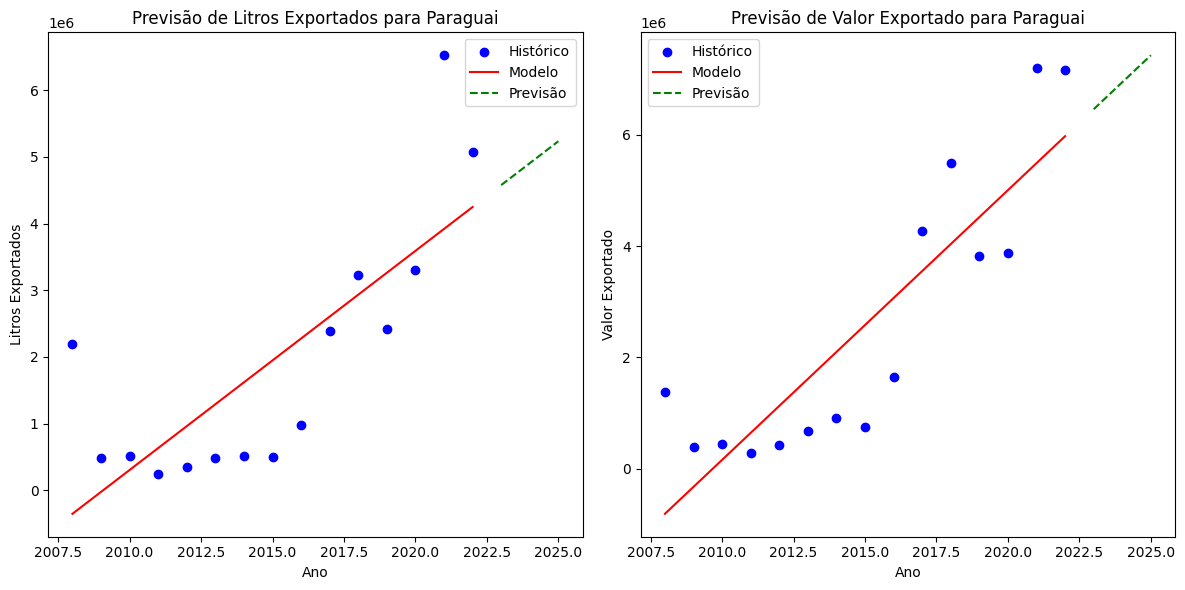

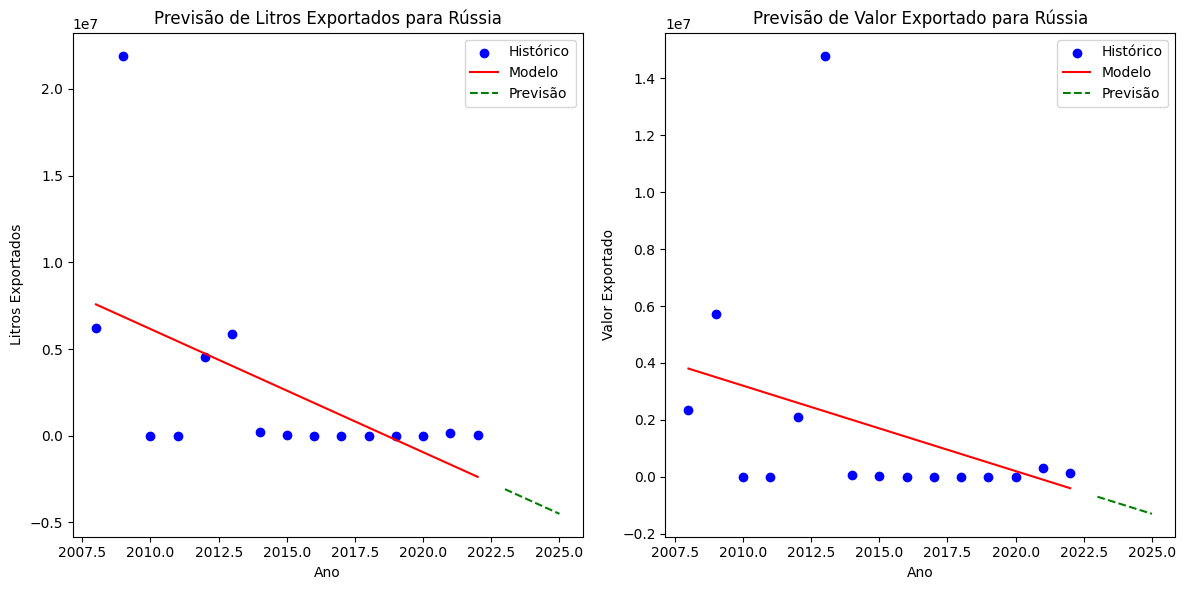

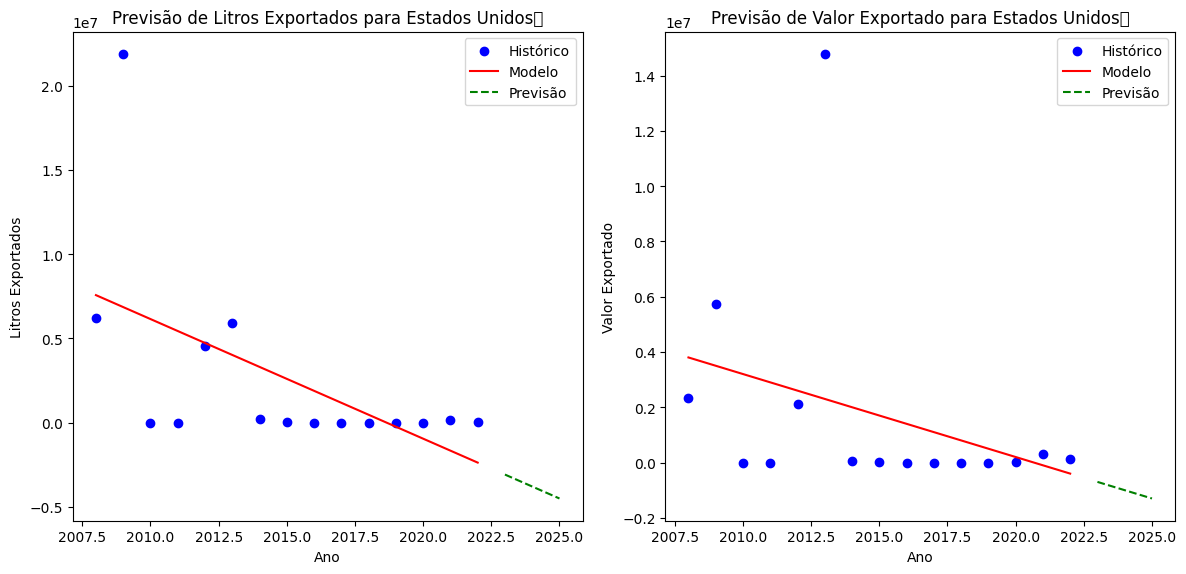

In [87]:
# Lista de países únicos no DataFrame
paises_unicos = dados_15_anos['País'].unique()

paises_a_visualizar = ['Paraguai', 'Rússia', 'Estados Unidos	']  #Lista de Paises

# Previsões e visualizações apenas para os países especificados
for pais in paises_a_visualizar:
    if pais in paises_unicos:  # Verifique se o país está presente nos dados
        # Filtrar os dados apenas para o país atual
        dados_pais = dados_15_anos[dados_15_anos['País'] == pais]
    
    # Preparar os dados
    X = dados_pais[['Ano']]  # Recurso: Ano
    y_litros = dados_pais['Litros']  # Variável alvo: Litros exportados
    y_valor = dados_pais['Valor']  # Variável alvo: Valor exportado
    
    # Treinar o modelo de regressão linear para prever os litros exportados
    modelo_litros = LinearRegression()
    modelo_litros.fit(X, y_litros)
    
    # Fazer previsões para os anos seguintes (por exemplo, até 2025)
    anos_futuros = pd.DataFrame({'Ano': range(2023, 2026)})  # Anos seguintes
    litros_pred_futuros = modelo_litros.predict(anos_futuros)  # Previsões de litros exportados
    
    # Treinar o modelo de regressão linear para prever o valor exportado
    modelo_valor = LinearRegression()
    modelo_valor.fit(X, y_valor)
    
    # Fazer previsões para os anos seguintes (por exemplo, até 2025)
    valor_pred_futuros = modelo_valor.predict(anos_futuros)  # Previsões de valor exportado
    
    # Visualizar as previsões
    plt.figure(figsize=(12, 6))
    
    # Plotar previsões de litros exportados
    plt.subplot(1, 2, 1)
    plt.scatter(X, y_litros, color='blue', label='Histórico')
    plt.plot(X, modelo_litros.predict(X), color='red', label='Modelo')
    plt.plot(anos_futuros, litros_pred_futuros, color='green', linestyle='--', label='Previsão')
    plt.xlabel('Ano')
    plt.ylabel('Litros Exportados')
    plt.title(f'Previsão de Litros Exportados para {pais}')
    plt.legend()
    
    # Plotar previsões de valor exportado
    plt.subplot(1, 2, 2)
    plt.scatter(X, y_valor, color='blue', label='Histórico')
    plt.plot(X, modelo_valor.predict(X), color='red', label='Modelo')
    plt.plot(anos_futuros, valor_pred_futuros, color='green', linestyle='--', label='Previsão')
    plt.xlabel('Ano')
    plt.ylabel('Valor Exportado')
    plt.title(f'Previsão de Valor Exportado para {pais}')
    plt.legend()
    
    plt.tight_layout()
    plt.show()